In [ ]:
# Bibliotecas usadas

import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Carregamento de dados

Nesta sessão, os dados serão carregados e analisadas falhas que possam existir no data set. Além disso, são dispostas algumas informações iniciais sobre os dados.

In [ ]:
# Carregando dados

df_manutencao = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Lighthouse/Cientista de Dados/desafio_manutencao_preditiva_treino.csv')

In [ ]:
# Verificação de valores nulos

df_manutencao.isnull().sum()

udi                      0
product_id               0
type                     0
air_temperature_k        0
process_temperature_k    0
rotational_speed_rpm     0
torque_nm                0
tool_wear_min            0
failure_type             0
dtype: int64

In [ ]:
# Informações dos tipos de dados

df_manutencao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6667 entries, 0 to 6666
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   udi                    6667 non-null   int64  
 1   product_id             6667 non-null   object 
 2   type                   6667 non-null   object 
 3   air_temperature_k      6667 non-null   float64
 4   process_temperature_k  6667 non-null   float64
 5   rotational_speed_rpm   6667 non-null   int64  
 6   torque_nm              6667 non-null   float64
 7   tool_wear_min          6667 non-null   int64  
 8   failure_type           6667 non-null   object 
dtypes: float64(3), int64(3), object(3)
memory usage: 468.9+ KB


Observa-se abaixo que o número de máquinas sem falhas é muito maior que o das que falham. Por isso, para tornar o conjunto de dados mais eficiente no momento de realizar análises exploratórias. Os dados serão agrupados em:

1 - Máquina falhou

0 - Máquina não falhou

Coluna: failure_type

In [ ]:
# Contagem de variáveis de falha

df_manutencao['failure_type'].value_counts()

No Failure                  6435
Heat Dissipation Failure      75
Power Failure                 63
Overstrain Failure            52
Tool Wear Failure             30
Random Failures               12
Name: failure_type, dtype: int64

In [ ]:
# Transformando o tipo da coluna

df_manutencao['failure_type'] = df_manutencao['failure_type'].astype(str)

# Modelando a coluna 'failure_type' em 1 e 0

df_manutencao['failure_type'] = [0 if column == 'No Failure' else 1 for column in df_manutencao['failure_type']]
df_manutencao['failure_type'].value_counts()

0    6435
1     232
Name: failure_type, dtype: int64

# 2. Análise Exploratória


Nesta sessão, encontram-se as principais estatísticas descritivas realizadas no conjunto de dados disponível. Estão separadas em 3 conjuntos:

**2.1** Tendências Centrais

**2.2** Variabilidade

**2.3** Variabilidade Conjunta

## 2.1 Tendências Centrais

As tendências centrais são aquelas que nos dão um panorama inicial de como os dados estão distribuídos e o que podemos esperar na futura construção do modelo. Dessa forma, observamos os principais valores presentes no conjunto de dados.

**Média**: a média é uma das medidas que nos indica onde estão distribuídos a maioria dos valores dos nossos dados. Por meio desse valor é possível ver a tendência central que determinada amostra pode adotar, entretanto, ela nem sempre mostra a medida centralizada em todos os dados. Para que isso aconteça, a distribuição deve ser normal, como é o caso da coluna torque_nm.

In [ ]:
# Média Aritmética

df_manutencao.mean()

<ipython-input-144-212448570635>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_manutencao.mean()


udi                      4994.589921
air_temperature_k         299.992515
process_temperature_k     309.992620
rotational_speed_rpm     1537.419529
torque_nm                  40.058512
tool_wear_min             108.098095
failure_type                0.034798
dtype: float64

**Moda**: outro valor central que pode ser visto no conjunto de dados é a moda, sendo esta a representação dos valores que mais aparecem no data set. Alguns valores mantêm sintonia com a média, como é o caso das variáveis air_temperature_k, process_temperature_k e torque_nm, o que nos indica que são distribuições normais. É válido destacar que o tipo de máquina mais frequente presente no conjunto de dados é o de qualidade baixa (L).

In [ ]:
# Cálculo da moda

moda = df_manutencao.mode(axis=0).iloc[0]
moda

udi                           1
product_id               H29424
type                          L
air_temperature_k         300.7
process_temperature_k     310.6
rotational_speed_rpm     1452.0
torque_nm                  40.6
tool_wear_min               0.0
failure_type                0.0
Name: 0, dtype: object

**Mediana**: o cálculo da mediana nos indica o valor que está no centro do conjunto de dados, com ele pode se constatar o padrão da distribuição normal presente nas análises anteriores. A variável rotational_speed_rpm é a que mais apresenta variação de sua média e moda, o que pode ser indício de que há maior variação nos valores dos dados. Isso poderá ser constatado posteriormente por meio do cálculo do desvio padrão.

In [ ]:
# Cálculo da mediana

mediana = df_manutencao.median()
mediana

<ipython-input-146-29085e6c8b11>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mediana = df_manutencao.median()


udi                      4983.0
air_temperature_k         300.0
process_temperature_k     310.0
rotational_speed_rpm     1503.0
torque_nm                  40.2
tool_wear_min             108.0
failure_type                0.0
dtype: float64

**Histogramas**: apresentando histogramas das colunas discutidas nas célulasacima, pode-se ver graficamente a representação da dispersão dos dados, assim como a moda, sendo os picos do histograma. Com esses gráficos, é possível ver a forma da distribuição normal em algumas das variáveis. A coluna tool_wear_min mostra valores uniformes, o que explica suas média, mediana e moda. A variável rotational_speed_rpm é a única que está enviesada para a esquerda, mostrando que pode haver presença de outliers.

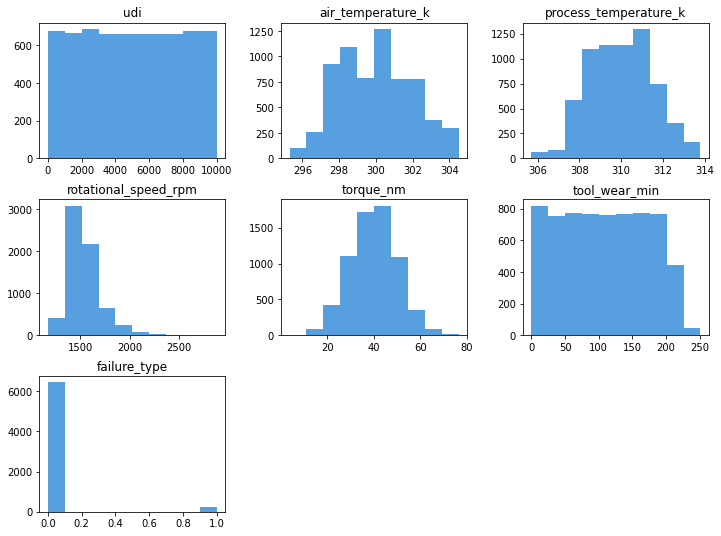

In [ ]:
# Histogramas

df_manutencao.hist(figsize=(12,9), grid=False, color='#579FDE')
plt.show()

## 2.2 Variabilidade

O cálculo das medidas centrais são essenciais, porém, não são suficientes para explicar o conjunto de dados. É necessário avaliar as variabilidade dos dados, ou seja, sua distribuição. Dois data sets com médias iguais podem ter a dispersão de seus dados diferentes, devidos a características como a amplitude dos valores e seu desvio padrão.

**Desvio Padrão**: o desvio padrão representa a média da dispersão dos dados em relação à média e é uma medida mais intuitivamente amigável que a variância, já que, ao elevar ao quadrado todos os valores, prevê que os valores abaixo e acima da média se cancelem. Diante disso, é possível notar que as colunas air_temperature_k e process_temperature_k possuem uma baixa variação, isso significa que os valores estão bem distribuídos próximos à média, o que pode ser atestado também pelos seus valores minímos e máximos. Em contrapartida, em relação à velocidade de rotação das máquinas, pode-se notar que seus valores têm variação maior.

In [ ]:
# Cálculo do desvio padrão

desvio_padrao = np.around(df_manutencao.std(), decimals=2)
desvio_padrao

<ipython-input-148-c464f584753d>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  desvio_padrao = np.around(df_manutencao.std(), decimals=2)


udi                      2896.13
air_temperature_k           1.99
process_temperature_k       1.49
rotational_speed_rpm      177.18
torque_nm                   9.95
tool_wear_min              63.36
failure_type                0.18
dtype: float64

**Assimetria**: como foi possível observar nos histogramas das médias das colunas, a variável rotational_speed_rpm parecia ser uma distribuição assimétrica. Ao fazer o cálculo da assimetria, percebe-se que esta coluna se destaca por seu resultado de valor alto e, plotando o gráfico de distribuição normal, observamos que se trata de uma distribuição assimétrica positiva, concentrada à esquerda. Isto significa que acharemos mais frequentemente valores extremos distantes do topo e não junto aos baixos.

In [ ]:
# Assimetria

assimetria = np.around(df_manutencao.skew(), decimals=3)
assimetria

<ipython-input-149-a694ba914c1b>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  assimetria = np.around(df_manutencao.skew(), decimals=3)


udi                      0.005
air_temperature_k        0.127
process_temperature_k    0.016
rotational_speed_rpm     1.953
torque_nm                0.012
tool_wear_min            0.020
failure_type             5.078
dtype: float64

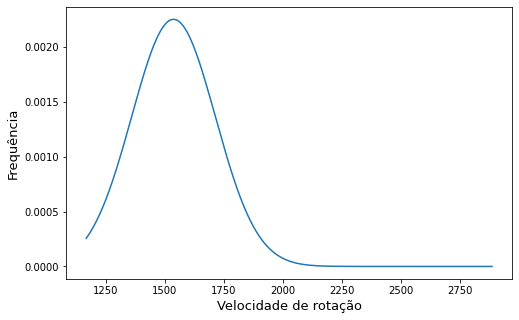

In [ ]:
# Distribuição normal da variável 'rotational_speed_rpm'

assimetria_rotational = df_manutencao['rotational_speed_rpm']

# Cálculo da média e desvio padrão

rotational_mean = assimetria_rotational.mean()
rotational_std = assimetria_rotational.std()

# Cálculo da Função densidade

pdf = stats.norm.pdf(assimetria_rotational.sort_values(), rotational_mean, rotational_std)

# Representação gráfica

plt.figure(figsize=(8,5))
plt.plot(assimetria_rotational.sort_values(), pdf)
plt.xlabel('Velocidade de rotação', size=13)
plt.ylabel('Frequência', size=13)
plt.show()


**Percentil**: observando os intervalos apresentados na função, verifica-se a distribuição dos valores de acordo com a porcentagem de dados que estão acima ou abaixo dela. Essa análise é uma forma de quantificar a dispersão dos dados e por meio do Intervalo Interquartil é possível calcular essa medida. É válido ressaltar que a variável rotational_speed_rpm mostra um alto intervalo de valores acima do Q3, assim como toque_nm e tool_wear_min, o que significa que os valores mais altos dessas colunas estão concentrados abaixo do Q3. Essas duas últimas colunas também, apresentam uma alta variação do número mínimo para o Q1.

In [ ]:
# Percentil

percentil = np.around(df_manutencao.describe(), decimals=2)[3:]
percentil

,udi,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min,failure_type
min,1.0,295.3,305.7,1168.0,3.8,0.0,0.0
25%,2496.5,298.3,308.8,1422.5,33.2,54.0,0.0
50%,4983.0,300.0,310.0,1503.0,40.2,108.0,0.0
75%,7510.5,301.5,311.1,1612.0,46.8,162.0,0.0
max,10000.0,304.5,313.8,2886.0,76.6,251.0,1.0


**Outliers**

A partir da visualização dos gráficos de caixa, é possível ver existem dados presentes acima do Q3 e Q1, entretanto, eles estão distribuídos de forma uniforme, sem se destacarem de maneira anormal do restante do data set. Aparentemente, não há possíveis erros de digitação que poderiam resultar em valores absurdos que justificariam a presença de outliers. Além disso, nota-se que as variáveis analisadas não demonstram ser de maquinas que poderiam ter sofrido algum processo diferenciado durante os testes, o que também seria uma causa da presença de outliers. Nas análises acima, foi possível perceber que a coluna rotational_speed_rpm, em especial, apresenta muitos valores acima do Q3. Com o gráfico isso ficou evidente, porém, não seria prudente retirar estes dados do conjunto, pois, eles são uma quantidade representativa das máquinas analisadas e, retirá-los, afetaria o resultado do modelo.

Portanto, diante disso, fica constatado que os dados não apresentam outliers, e, nesse momento, não haverá retirada de valores.

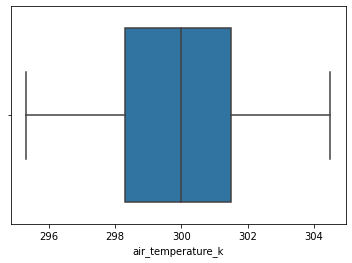

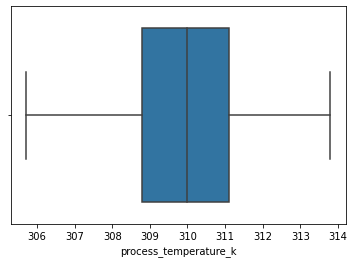

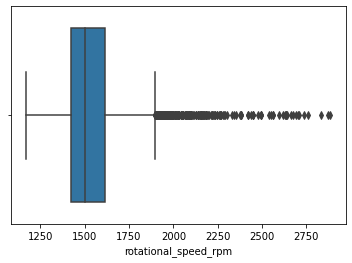

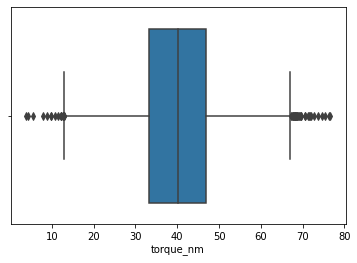

In [ ]:
# Verificação de outliers

sns.boxplot(x=df_manutencao['air_temperature_k'])
plt.show()
sns.boxplot(x=df_manutencao['process_temperature_k'])
plt.show()
sns.boxplot(x=df_manutencao['rotational_speed_rpm'])
plt.show()
sns.boxplot(x=df_manutencao['torque_nm'])
plt.show()

## 2.3 Variabilidade Conjunta

**Coeficiente de Correlação**: o coeficiente de correlação mede o quanto o valor de uma variável muda em relação a outra. Dessa forma, ao observá-las, é possível que uma variável auxilie na predição de outra e, através de gráficos, podemos ver se essas relações têm ligação com o fato das máquinas terem falhado ou não.

Observando o quadro abaixo, é possível inferir duas principais correlações:

* air_temperature_k e process_temperature_k com uma forte correlação positiva

* torque_nm e rotational_speed_rpm com uma forte correlação negativa

Ao plotar gráficos, separando por falha, poderemos ver como ela se comporta nessas correlações.

In [ ]:
# Coeficiente de correlação

df_corr = np.around(df_manutencao.corr(method='pearson'), decimals=3)
df_corr

,udi,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min,failure_type
udi,1.000,0.118,0.327,0.004,-0.003,-0.003,-0.015
air_temperature_k,0.118,1.000,0.876,0.036,-0.023,0.021,0.081
process_temperature_k,0.327,0.876,1.000,0.033,-0.024,0.020,0.038
rotational_speed_rpm,0.004,0.036,0.033,1.000,-0.876,-0.001,-0.052
torque_nm,-0.003,-0.023,-0.024,-0.876,1.000,-0.004,0.193
tool_wear_min,-0.003,0.021,0.020,-0.001,-0.004,1.000,0.113
failure_type,-0.015,0.081,0.038,-0.052,0.193,0.113,1.000


Ao comparar air_temperature_k e process_temperature_k, constatamos a correlação positiva das duas variáveis, porém, não é possível dizer que a falha acompanha esta correlação, já que os pontos que a representam se encontram espalhados de forma uniforme pelo gráfico.

Já na comparação de rotational_speed_rpm e torque_nm, vemos uma correlação negativa, onde máquinas com alto torque e alta velocidade racional, apresentam alto número de falha.

In [ ]:
# Amostra do dataframe

df_amostra = df_manutencao.sample(1000) # Amostra de aproximadamente 15%

# Função gráfico

def grafico(x, y, ylabel, xlabel):
  plt.figure(figsize=(10,8))
  sns.scatterplot(data=df_amostra, 
                x=x, 
                y=y, 
                hue='failure_type', 
                hue_order=[1, 0], 
                style='failure_type', 
                s=30, 
                palette=['#0F68C1', '#BEC0C1'],
                alpha=0.8)
  plt.legend(labels = ['Não falhou', 'Falhou'], fontsize=15)
  plt.ylabel(ylabel, fontsize=13.0)
  plt.xlabel(xlabel, fontsize=13.0)
  return plt.show()

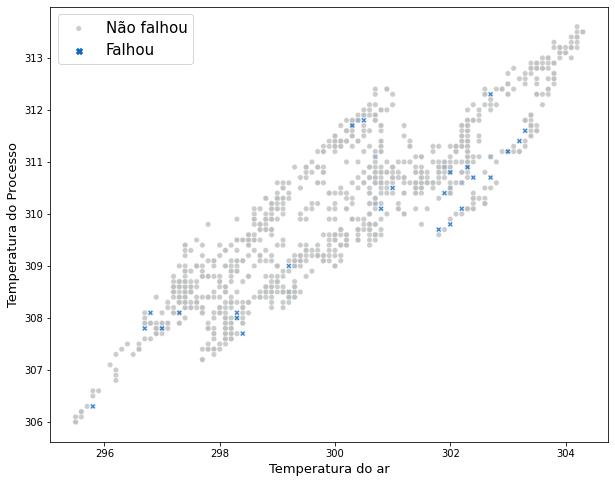

In [ ]:
# Scatter plot

grafico(x='air_temperature_k', y='process_temperature_k', ylabel='Temperatura do Processo', xlabel='Temperatura do ar')

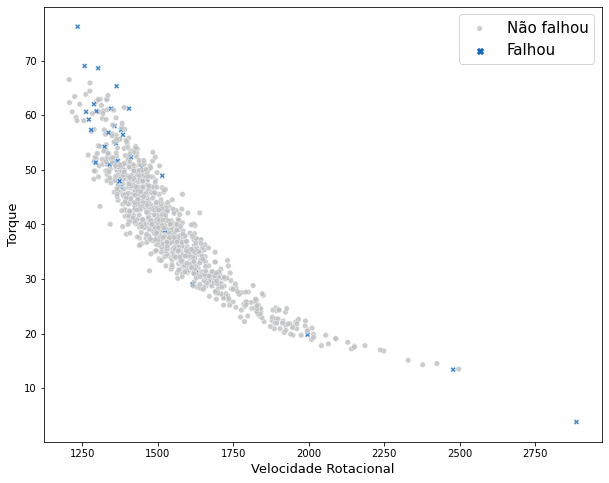

In [ ]:
# Scatter plot

grafico(x='rotational_speed_rpm', y='torque_nm', ylabel='Torque', xlabel='Velocidade Rotacional')